In [1]:
import torch

In [2]:
from torch import nn

In [3]:
import torchvision

/home/sbn/miniconda3/envs/deeplearning0/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/sbn/miniconda3/envs/deeplearning0/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [4]:
# from torchvision.io import read_image

In [5]:
# img = read_image("data/oldman/1.jpg")

In [6]:
from matplotlib import image
from matplotlib import pyplot

img = image.imread("data/oldman/1.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'data/oldman/1.jpg'

In [ ]:
import torchvision.transforms.functional as F
F.to_pil_image(img)

In [68]:
from PIL import Image
img = Image.open("data/oldman/1.jpg")

In [74]:
tranform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize((0,0,0), (0.5, 0.5, 0.5)),
        torchvision.transforms.Grayscale(num_output_channels=1),

    
])

In [75]:
tranform(img).shape

torch.Size([1, 720, 1280])

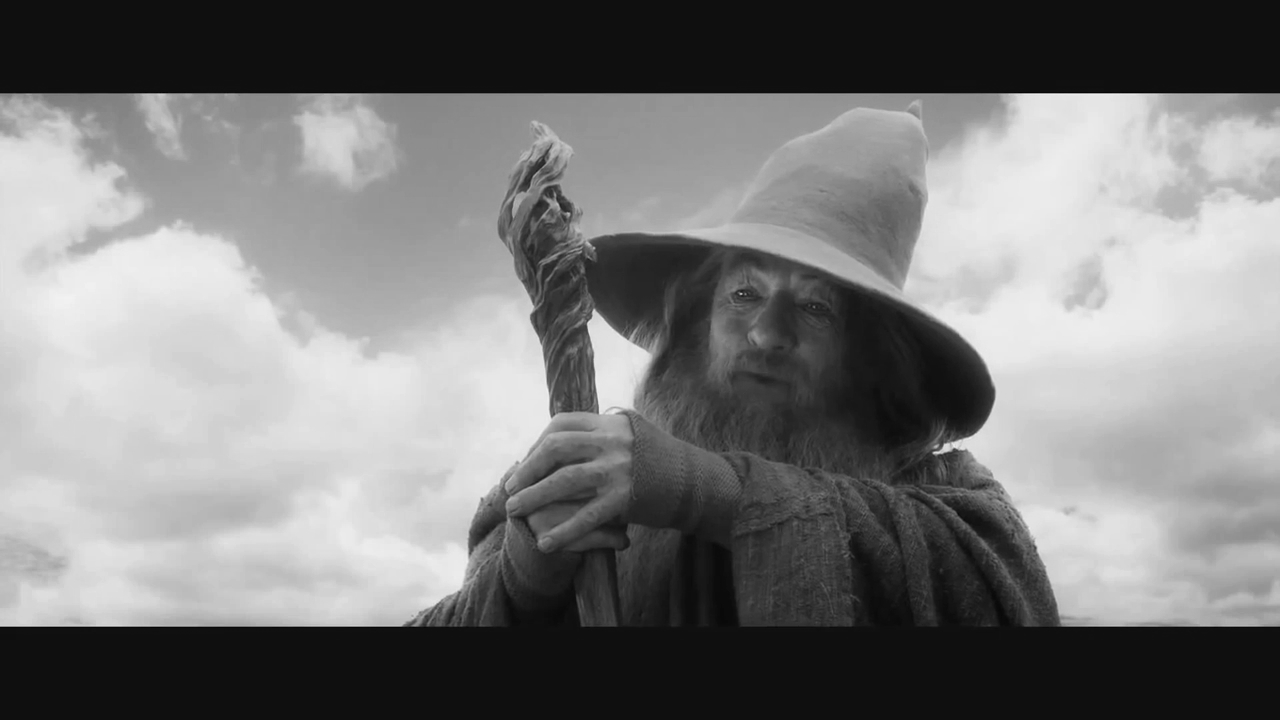

In [76]:
F.to_pil_image(tranform(img))

In [77]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt
 
# # Read Images
# img = mpimg.imread("img (877).jpg")

# Output Images
# plt.imshow(img)

In [79]:
# img.shape, tranform(img).shape

In [80]:
img_torch = tranform(img)

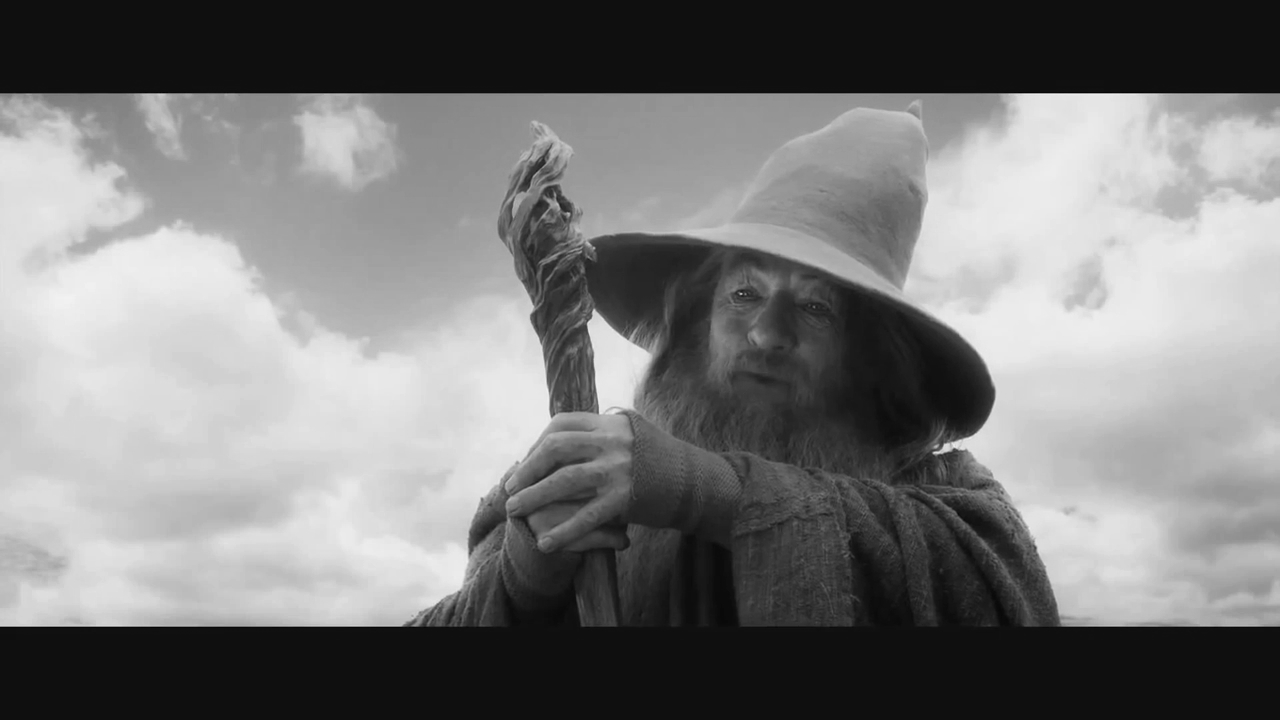

In [81]:
F.to_pil_image(img_torch[0])

In [82]:
# the probelm to face here is that the images (normally) have w*h*3 shape
# but for convlutions we want sth of size 3*w*h

In [83]:
# img_torch = torch.zeros((3,720,1280))

In [84]:
# img [:,:, 0].shape, img_torch[0,:,:].shape

In [85]:
# img_torch[0,:,:] = torch.tensor(img [:,:, 0])
# img_torch[1,:,:] = torch.tensor(img [:,:, 1])
# img_torch[2,:,:] = torch.tensor(img [:,:, 2])

In [86]:
img_torch.shape

torch.Size([1, 720, 1280])

In [87]:
# img_torch = img_torch.reshape(1,3,720,1280)

In [21]:
# img_torch = torch.tensor(img)

In [22]:
CNN = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2)  ,
    nn.Conv2d(in_channels=10,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Conv2d(in_channels=10,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Conv2d(in_channels=10,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Conv2d(in_channels=10,out_channels=1, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(880,100),
    
    nn.Linear(100,4*9*16),
    # nn.ReLU(True),
    # nn.Linear(270, ),
    nn.Unflatten(dim=1, unflattened_size=(4,  9,16)),
    nn.ConvTranspose2d(in_channels=4, out_channels=8, kernel_size=(5,5), stride=1, padding=2),
    nn.Upsample(scale_factor=(4,4), mode='bilinear'),
    
    nn.ConvTranspose2d(in_channels=8, out_channels=8, kernel_size=(5,5), stride=1, padding=2),
    nn.Upsample(scale_factor=(4,4), mode='bilinear'),
    
    nn.ConvTranspose2d(in_channels=8, out_channels=1, kernel_size=(5,5), stride=1, padding=2),
    nn.Upsample(scale_factor=(5,5), mode='bilinear'),

    
    
)

In [23]:
CNN = CNN.float()

In [24]:
CNNed_img = CNN(img_torch.float())
CNNed_img.shape

torch.Size([1, 1, 720, 1280])

In [25]:
# plt.imshow(CNNed_img.
#            reshape(CNNed_img.shape[2],CNNed_img.shape[3])
#            .detach().numpy())

In [26]:
CNN = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2)  
    # nn.Conv2d(in_channels=3,out_channels=10, kernel_size=(3,3), padding=1) ,
    # nn.MaxPool2d(kernel_size=(2,2), stride=2)
    # nn.Conv2d(in_channels=3,out_channels=10, kernel_size=(3,3), padding=1) ,


    
)

In [27]:
# CNN(img1)
# CNN(img2)

In [28]:
# to do:
# add ReLU after each conv

In [88]:
CNN_enc = nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=10, kernel_size=(3,3), padding=1) ,
    # nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=2)  ,
    nn.ReLU(),
    nn.Conv2d(in_channels=10,out_channels=10, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=10,out_channels=1, kernel_size=(3,3), padding=1) ,
    nn.MaxPool2d(kernel_size=(5,5), stride=2, padding=2),
    nn.ReLU(),
    
    # nn.Conv2d(in_channels=10,out_channels=10, kernel_size=(3,3), padding=1) ,
    # nn.MaxPool2d(kernel_size=(2,2), stride=2),
    # nn.ReLU(),
    # nn.Conv2d(in_channels=10,out_channels=1, kernel_size=(3,3), padding=1) ,
    # nn.MaxPool2d(kernel_size=(2,2), stride=2),
    # nn.ReLU(),
    # nn.Flatten(start_dim=1),
    # nn.Linear(144000, 8800)
    nn.Flatten(start_dim=1),
    nn.ReLU(),

    nn.Linear(90*160,100),
    nn.ReLU(),

    nn.Linear(100,100),
    nn.ReLU(),

)

In [89]:
CNN_enc(img_torch).shape

torch.Size([1, 100])

In [90]:
CNN_dec = nn.Sequential(
    nn.Linear(100,4*9*16),
    # nn.ReLU(True),
    # nn.Linear(270, ),
    nn.Unflatten(dim=1, unflattened_size=(4,  9,16)),
    nn.ConvTranspose2d(in_channels=4, out_channels=8, kernel_size=(5,5), stride=1, padding=2),
    nn.ReLU(),

    nn.Upsample(scale_factor=(4,4), mode='bilinear'),
    
    nn.ConvTranspose2d(in_channels=8, out_channels=8, kernel_size=(5,5), stride=1, padding=2),
    nn.ReLU(),
    
    nn.Upsample(scale_factor=(4,4), mode='bilinear'),
    
    nn.ConvTranspose2d(in_channels=8, out_channels=1, kernel_size=(5,5), stride=1, padding=2),
    nn.ReLU(),
    
    nn.Upsample(scale_factor=(5,5), mode='bilinear'),
)


In [91]:
CNN_dec(torch.rand((1, 100))).shape

torch.Size([1, 1, 720, 1280])

In [92]:
# CNN_dec(CNN_enc(torch.cat((img_torch, img_torch), axis=1)))

In [93]:
CNN_enc(img_torch).shape

torch.Size([1, 100])

In [94]:
img1_cnn_enc = CNN_enc(img_torch)
img2_cnn_enc = CNN_enc(img_torch)
torch.cat((img1_cnn_enc, img2_cnn_enc), axis=1).shape

torch.Size([1, 200])

In [95]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()        
        # self.img1 = img1
        # self.img2 = img2

    def forward(self, img1):
        img1_cnn_enc = CNN_enc(img1)
#         img2_cnn_enc = CNN_enc(img2)
        inp =  img1_cnn_enc
#         inp = torch.cat((img1_cnn_enc, img2_cnn_enc), axis=1)
        return CNN_dec(inp)
        
        
        
    

In [96]:
img_torch.shape

torch.Size([1, 720, 1280])

In [97]:
net = Net()

In [98]:
# net(img_torch, img_torch).shape

In [99]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread("img (877).jpg")


In [100]:
import os
from os import listdir
 
img = []
folder_dir = "data/oldman"
for images_name in os.listdir(folder_dir):
 
    # check if the image ends with png or jpg or jpeg
    if (images_name.endswith(".png") or images_name.endswith(".jpg")):
        # display
        img.append(mpimg.imread(folder_dir+"/"+images_name))
        # print(images_name)

In [101]:
img[0].shape

(720, 1280, 3)

In [102]:
# img = torch.tensor(img)

In [103]:
# img.shape

In [120]:
img_torch = torch.zeros((len(img), 1,720,1280))
# img_torch = torch.zeros((3,720,1280))
for i in range(len(img)):
    img_torch[i, :,:,:] = tranform(img[i]) 

In [121]:
img_torch.shape

torch.Size([85, 1, 720, 1280])

In [122]:
# img[0]
import numpy as np

In [123]:
# plt.imshow(img[80].reshape(720, 1280, 3))

In [124]:
net.parameters()

<generator object Module.parameters at 0x7fec90f285f0>

In [125]:
lr= 0.003
params_to_optimize = [{'params':net.parameters()}]

optim = torch.optim.SGD(params_to_optimize, lr=lr, weight_decay=1e-05)

In [126]:
img_torch[0].shape

torch.Size([1, 720, 1280])

In [127]:
net(img_torch[0].reshape(1,1, 720, 1280), 
#     img_torch[2].reshape(1,3, 720, 1280)
   ).shape

torch.Size([1, 1, 720, 1280])

In [128]:
# for i in range(0,10,2):
#     print(i)

In [129]:
def train_epoch(loss_fn, optimizer):
    # Set train mode for both the encoder and the decoder
    net.train()
    for epoch in range(20):
        train_loss = []
        # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
        for i in range(0, len(img)-2, 1): 
            
            # two points are inputs
            y_hat = net(img_torch[i].reshape(1,1, 720, 1280), 
#                         img_torch[i+2].reshape(1,3, 720, 1280)
                       )
            
            # middle point
            y = img_torch[i].reshape(1,1, 720, 1280)
            
            # Evaluate loss
            loss = loss_fn(y, y_hat)
#             print(loss)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.detach().cpu().numpy())
            # Print batch loss
        print(f' epoch: {epoch}:  {np.mean(train_loss)}')
        

    return np.mean(train_loss)

In [130]:
loss_fn = torch.nn.MSELoss()

In [132]:
loss_fn(img_torch[0].reshape(1,1, 720, 1280), 
        img_torch[2].reshape(1,1, 720, 1280)
        )

tensor(0.0018)

In [133]:
train_epoch(
            loss_fn=loss_fn, 
            optimizer=optim)

 epoch: 0:  0.3366756737232208
 epoch: 1:  0.3366756737232208


KeyboardInterrupt: 

In [57]:
sample = net(img_torch[0].reshape(1,3, 720, 1280), 
#                         img_torch[2].reshape(1,3, 720, 1280)
                       ).reshape(3, 720, 1280)

In [58]:
sample.shape

torch.Size([3, 720, 1280])

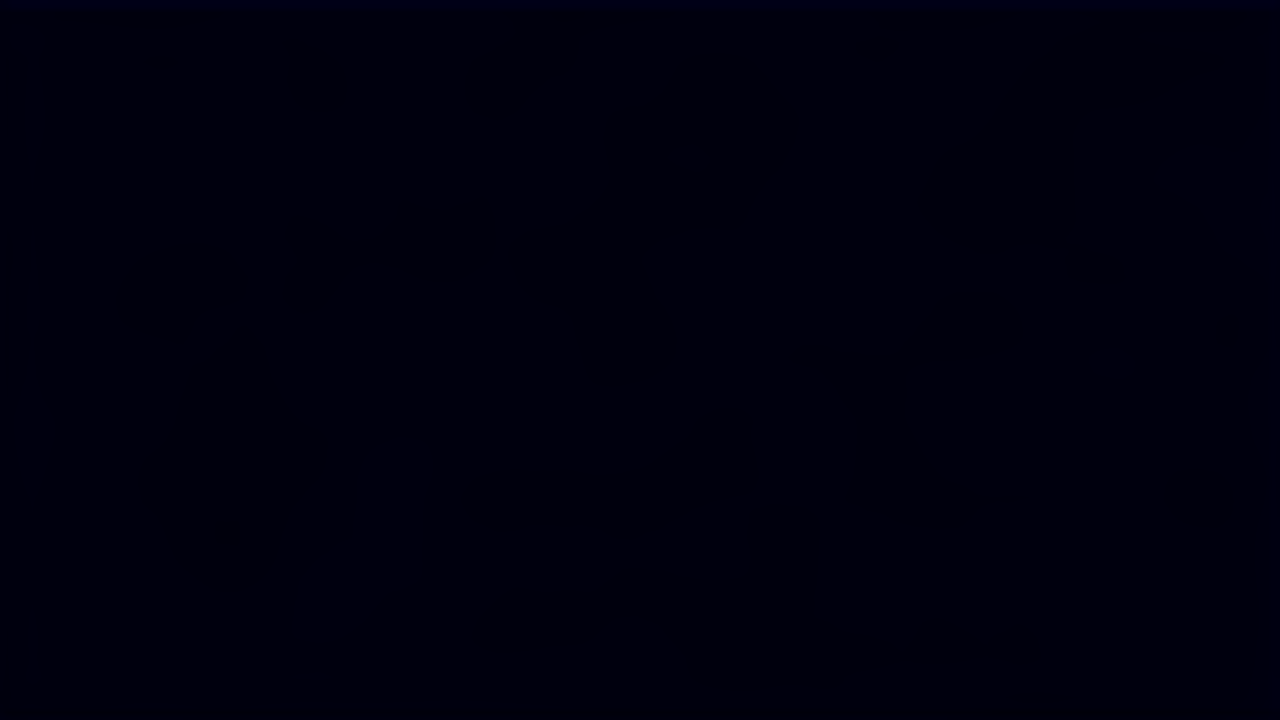

In [59]:
F.to_pil_image(sample)